# Calculate pre-tagged control plots for ttbar All-Hadronic Analysis

These are pre-tagged control plots of the QCD sample.
 - QCD MC is `/QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8/RunIIFall17NanoAODv4-PU2017_12Apr2018_Nano14Dec2018_102X_mc2017_realistic_v6-v1/NANOAODSIM` from the 94x re-reco. 
 - JetHT dataset, Trigger is OR of
 ```
    'HLT_AK8PFJet400_TrimMass30',
    'HLT_AK8PFJet420_TrimMass30',
    'HLT_AK8PFJet500',
    'HLT_AK8PFJet550',
    'HLT_PFHT1050',
    'HLT_AK8PFHT850_TrimMass50',
    'HLT_AK8PFHT900_TrimMass50',
```
 - $\ge 2$ jets with $p_T > 400$ GeV and $|\eta| < 2.5$
 - Loose jet ID
 - $H_T > 1100$ GeV from AK4 jets (to be on trigger threshold)
 - Substructure plots ($\tau_{32}$ and $N_3$) have $100 < m_{softdrop} < 250$ GeV
 - JECs:
  - L1,L2,L3
  - Defaults from MINIAOD. I THINK they are:
   - 2016: `Summer16_23Sep2016V4`
   - 2017: `Fall17_17Nov2017_V6`
   - 2018: `101X_dataRun2_Prompt_v9`

Welcome to JupyROOT 6.12/04


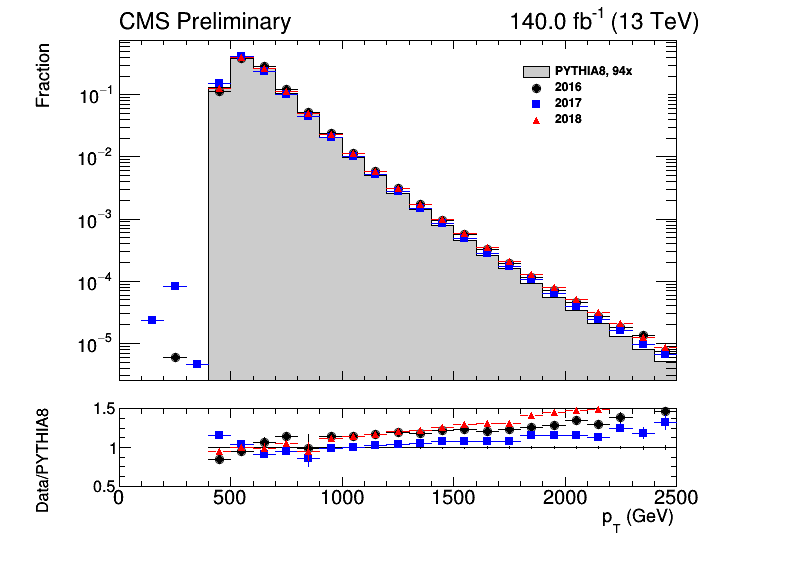

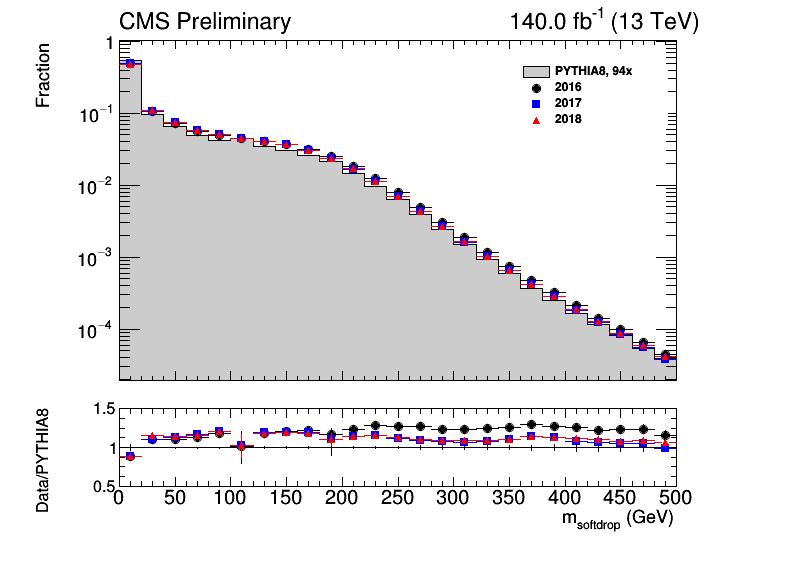

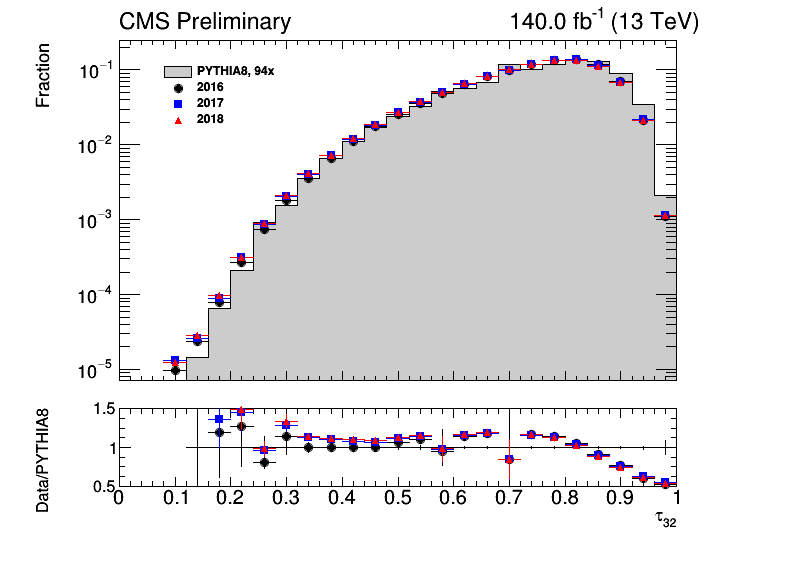

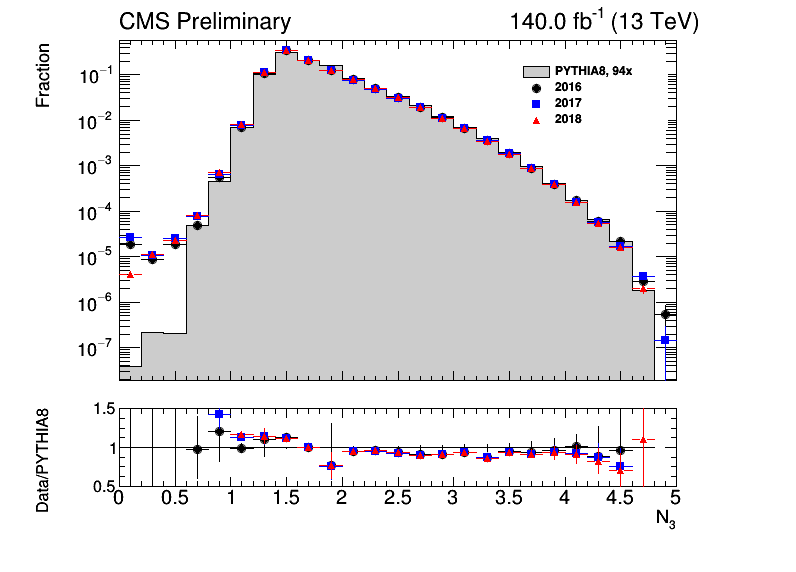

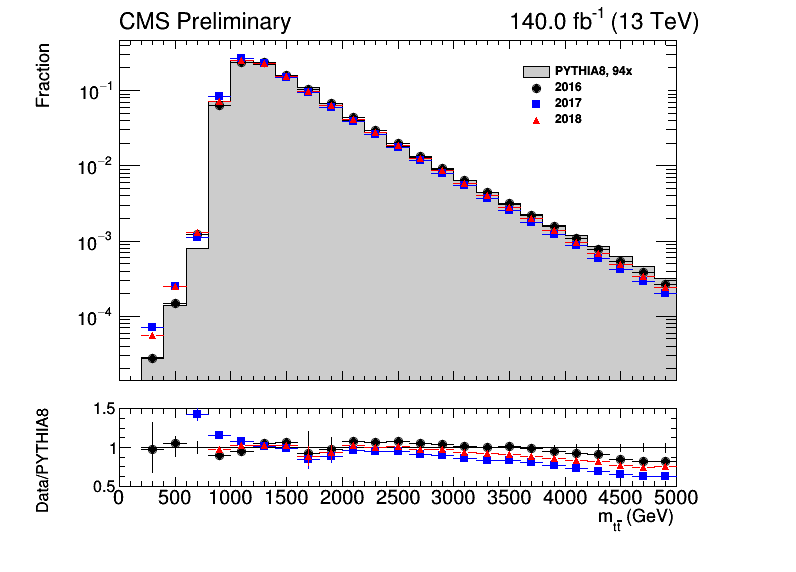

In [1]:
#!/usr/bin/env python

import ROOT
import itertools

import sys
sys.path
sys.path.append('../../python')

from tdrstyle import setTDRStyle

from HistDriver import *

setTDRStyle()

years = ['2016', '2017', '2018']
fnames = [ '../hists/ControlPlots_crab__JetHT_Run%s-Nano14Dec2018-v1.root' % (s) for s in years]
files = [ ROOT.TFile(s) for s in fnames ]
f_qcd = ROOT.TFile( '../hists/ControlPlots_crab__QCD_Pt-15to7000_TuneCP5_Flat_13TeV_pythia8_RunIIFall17NanoAODv4-PU2017_12Apr2018_Nano14Dec2018_102X.root' )
histnames = [
    'ttbarres/h_ak8pt',
    'ttbarres/h_ak8msd',
    'ttbarres/h_ak8tau32',
    'ttbarres/h_ak8n3b1',
    'ttbarres/h_mttbar'
]
histtitles = [
    ';p_{T} (GeV); Fraction',
    ';m_{softdrop} (GeV); Fraction',
    ';#tau_{32}; Fraction',
    ';N_{3}; Fraction',
    ';m_{t#bar{t}} (GeV);Fraction'
]
locs = [
    [0.65,0.68,0.84,0.84],
    [0.65,0.68,0.84,0.84],
    [0.20,0.68,0.39,0.84],
    [0.65,0.68,0.84,0.84],
    [0.65,0.68,0.84,0.84],
]
f_qcd.cd("ttbarres")
for f in files:
    f.cd("ttbarres")

canvs = []
legs = []

allhists = []

driver = HistDriver()

for ihist,histname in enumerate(histnames):
    
    leg = ROOT.TLegend(locs[ihist][0],locs[ihist][1],locs[ihist][2],locs[ihist][3])
    leg.SetFillColor(0)
    leg.SetBorderSize(0)
    
    
    c = ROOT.TCanvas('c_' + histname, 'c_' + histname, 800,600)    
    p1,p2 = driver.setupPads(c)
    
    hmc = f_qcd.Get(histname).Clone( histname )
    hmc.SetTitle(histtitles[ihist])
    
    setStylesClass(hmc, driver.styles['pythia8'])
    
    if hmc.Integral() > 0:
        hmc.Scale(1.0/hmc.Integral())
    driver.plotHistAndRatio( p1,p2, hmc, hmc, option1="hist", ratiotitle='Data/PYTHIA8', logy=True, ratiorange=[0.5,1.5] )
    allhists.append(hmc)
    #stack = ROOT.THStack('hs_' + histname, histtitles[ihist])
    #stack.Add( hmc, "hist" )
    leg.AddEntry(hmc,  'PYTHIA8, 94x', 'f')
    
    for iyear,year in enumerate(years):
        h = files[iyear].Get(histname).Clone( histname + '_' + year)
        if h.Integral() > 0:
            h.Scale(1.0/h.Integral())
        setStylesClass(h, driver.styles[year])
        allhists.append(h)
        leg.AddEntry(h, year, 'p')
        driver.plotHistAndRatio( p1,p2, h, hmc, option1="same", option2="same", ratiotitle='Data/PYTHIA8', logy=True, ratiorange=[0.5,1.5] )
    #p1.cd()
    #stack.Draw("nostack")
    p1.cd()
    leg.Draw()
    driver.stampCMS( pad=p1, text="CMS Preliminary", lumi = 140e3 )
    
    c.Draw()
    c.Update()
    canvs.append(c)
    legs.append(leg)
    c.Print(histname.split('/')[1] + '.png', 'png')
    c.Print(histname.split('/')[1] + '.pdf', 'pdf')
    
    
        
        
        

